# Graphical Exploratory Data Analysis: 

Before diving into sophisticated statistical inference techniques, you should first explore your data by plotting them and computing simple summary statistics. This process, called exploratory data analysis, is a crucial first step in statistical analysis of data.

In [1]:
# Importing module
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set()

In [2]:
# Read the data
df_swing = pd.read_csv('2008_swing_states.csv')
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


### Histogram

A histogram is an approximate representation of the distribution of numerical data. The term was first introduced by Karl Pearson. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent and are often (but not required to be) of equal size. More: https://en.wikipedia.org/wiki/Histogram

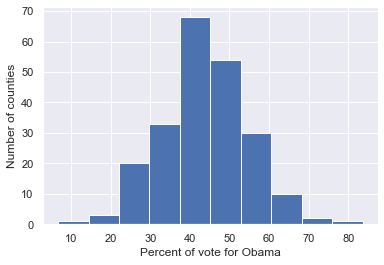

In [3]:
# plt hitogram
plt.hist(df_swing['dem_share'], bins=10)
_ = plt.xlabel('Percent of vote for Obama')
_ = plt.ylabel('Number of counties')
plt.show()


A major drawback of using histograms is that the same data set can look different depending on how the bins are chosen. And choice of bins is in many ways arbitrary. This leads to binning bias; you might interpret your plot differently for two different choices of bin number. An additional problem with histograms is that we are not plotting all of the data. We are sweeping the data into bins, and losing their actual values. To remedy these problems we can make a bee swarm plot, also called a swarm plot.

### Bee swarm plot
Draw a categorical scatterplot with points adjusted to be non-overlapping. The points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values.https://seaborn.pydata.org/generated/seaborn.swarmplot.html

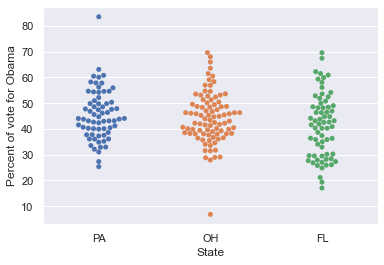

In [4]:
# Plot swarm plot
_ = sns.swarmplot(x='state', y='dem_share', data=df_swing)
_ = plt.xlabel('State')
_ = plt.ylabel('Percent of vote for Obama')
plt.show()

Note that Bee swarm plot does not scale well to large numbers of observations. This style of plot is sometimes called a “beeswarm”. In this case Empirical cumulative distribution function (ECDF) is the solution.

### Empirical cumulative distribution function (ECDF)
An ECDF is an estimator of the Cumulative Distribution Function. The ECDF essentially allows you to plot a feature of your data in order from least to greatest and see the whole feature as if is distributed across the data set. For more:
https://towardsdatascience.com/what-why-and-how-to-read-empirical-cdf-123e2b922480#:~:text=An%20ECDF%20is%20an%20estimator,distributed%20across%20the%20data%20set.

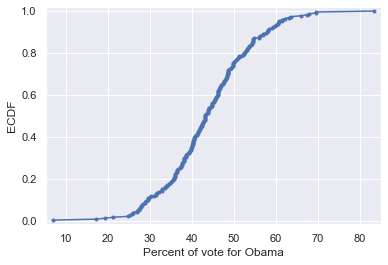

In [5]:
# Sorting dem_share
x = np.sort(df_swing['dem_share'])
y = np.arange(1, len(x)+1)/len(x)

# Plot
_ = plt.plot(x, y, marker='.', linestyle=None)
_ = plt.xlabel('Percent of vote for Obama')
_ = plt.ylabel('ECDF')

# Set the margins
plt.margins(0.02)
plt.show()


### We can make ECDF function by definition 

In [6]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, 1+n) / n

    return x, y

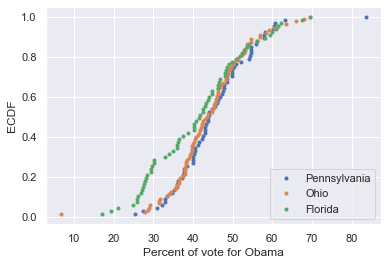

In [7]:
import matplotlib.pyplot as plt

# Get the data for PA, OH, FL
df_swing_PA = df_swing[df_swing['state'] == 'PA']
df_swing_OH = df_swing[df_swing['state'] == 'OH']
df_swing_FL = df_swing[df_swing['state'] == 'FL']

# Compute ECDF
x_pa, y_pa = ecdf(df_swing_PA['dem_share'])
x_oh, y_oh = ecdf(df_swing_OH['dem_share'])
x_fl, y_fl = ecdf(df_swing_FL['dem_share'])

# Plot all ECDFs on the same plot
_ = plt.plot(x_pa, y_pa, marker='.', linestyle='none')
_ = plt.plot(x_oh, y_oh, marker='.', linestyle='none')
_ = plt.plot(x_fl, y_fl, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('Pennsylvania', 'Ohio', 'Florida'), loc='lower right')
_ = plt.xlabel('Percent of vote for Obama')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()
